To use the library, just import `TruncMVN` from the module `truncatedMVN`:

In [6]:
from truncatedMVN import TruncMVN
import numpy as np

Here we define a 2d MVN (giving its mean and covariance), and the planes that truncate it. We call the plot function to illustrate.

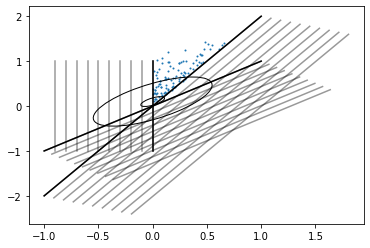

In [7]:
mean = np.array([0,0.1])
cov = np.array([[0.3,0.2],[0.2,0.3]])
planes = np.array([[1,0],[-1,1],[-2,1]])
tm = TruncMVN(mean,cov,planes)
tm.plot()

In [9]:
tm.sample() #to draw samples, use the 'sample' method

array([[0.02114244, 0.05312916],
       [0.02085154, 0.2216534 ],
       [0.00088616, 0.06055038],
       [0.00811488, 0.0686495 ],
       [0.01810147, 0.32557781],
       [0.01046133, 0.09610857],
       [0.03350272, 0.20436906],
       [0.02102896, 0.16944426],
       [0.01726339, 0.6261805 ],
       [0.06182361, 0.4175822 ]])

We can compute the Gelman Rubin statistic to assess if it's converging well.
By default this generates 100 samples with 10 chains.

It should be around 1 in all (2) dimensions, which it is (it should be less than about 1.2 anyway).

In [11]:
tm.compute_gelman_rubin() #default is 100 samples (no thinning), 100 burn-in iterations, and 10 chains.

array([0.99901255, 1.03816152])

We might have a more challenging distribution to sample from, for example if the two truncating planes are very close together in an off-axis direction.

We illustrate this problem in this figure:

(-0.5, 1.5)

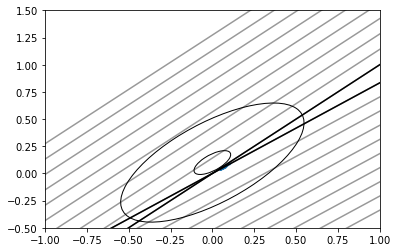

In [12]:
import matplotlib.pyplot as plt
planes = np.array([[10,-10],[-10,12]])
tm = TruncMVN(mean,cov,planes)
tm.plot()
plt.xlim([-1,1])
plt.ylim([-0.5,1.5])

Computing the Gelman-Rubin statistic now we find we've got a problem: These values are much greater than 1 which means we're not converging.

In [13]:
tm.compute_gelman_rubin()

array([6.11303744, 5.2874246 ])

We could introduce thinning, and increase the number of samples.

Note that thinning and burnin is set in the call to the constructor, while the number of samples is in the call to samples etc.

In [14]:
tm = TruncMVN(mean,cov,planes,thinning=20,burnin=100)
tm.compute_gelman_rubin(Nsamples=300,Nchains=5)

array([1.0389298 , 1.03308337])

This seems to have alleviated the problem.

(-0.5, 1.5)

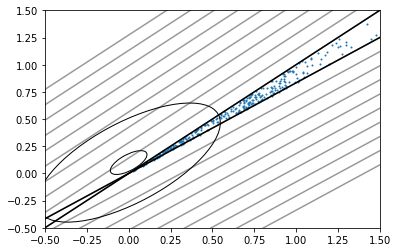

In [15]:
import matplotlib.pyplot as plt
tm.plot(samples=300)
plt.xlim([-.5,1.5])
plt.ylim([-.5,1.5])